In [1]:
#STEP 1 : Dataset Download Done


In [3]:
#STEP 2 : Visualization Using Matplotlib


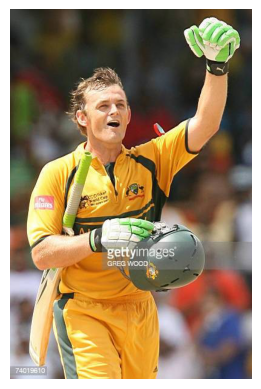

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

from pathlib import Path
root = Path().resolve()
data_dir = root / "Cricket Legends"    

# Image Path
img_path = next(data_dir.rglob("*.jpg"))  


img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
#STEP 3 : Data Augmentation


In [1]:
# imports
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


In [2]:
# locate & load one sample image, resize for consistency
data_dir = "Cricket Legends"
img_path = next(Path(data_dir).rglob("*.jpg"))
original = Image.open(img_path).resize((150,150))


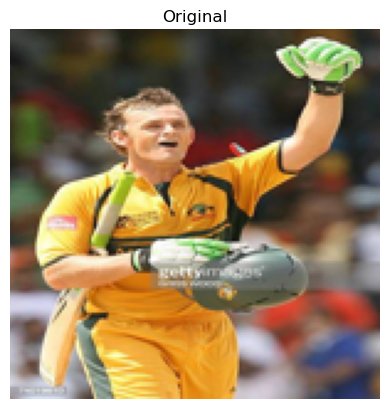

In [21]:
# show the **original** image
plt.imshow(original)
plt.title("Original")
plt.axis("off")
plt.show()


In [7]:
# turn PIL image into a 4D tensor (batch dimension)
x = np.expand_dims(np.array(original), axis=0)


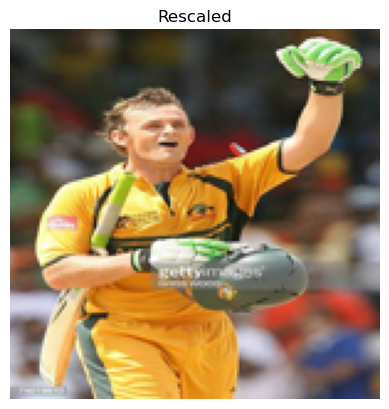

In [23]:
# rescale pixels from [0–255] to [0–1]
datagen = ImageDataGenerator(rescale=1./255)
batch = next(datagen.flow(x, batch_size=1))
plt.imshow(batch[0])
plt.title("Rescaled")
plt.axis("off")
plt.show()

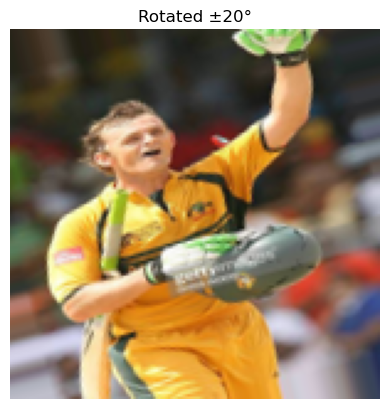

In [25]:
# rotation only
datagen = ImageDataGenerator(rotation_range=20, rescale=1./255, fill_mode='nearest')
batch = next(datagen.flow(x, batch_size=1))
plt.imshow(batch[0])
plt.title("Rotated ±20°")
plt.axis("off")
plt.show()

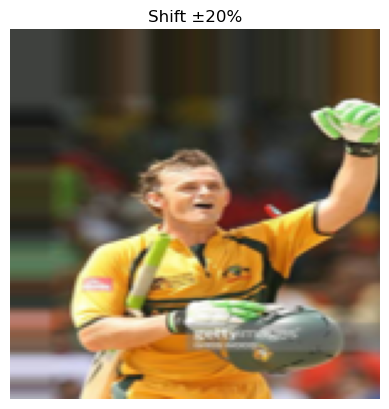

In [27]:
# width & height shift
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1./255,
                             fill_mode='nearest')
batch = next(datagen.flow(x, batch_size=1))
plt.imshow(batch[0])
plt.title("Shift ±20%")
plt.axis("off")
plt.show()


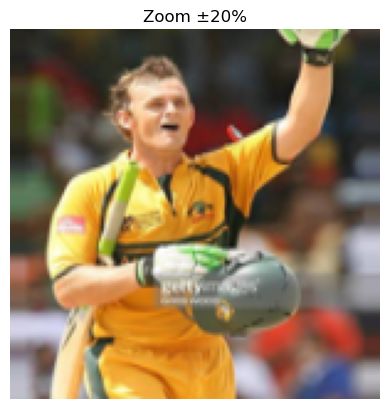

In [29]:
# zoom
datagen = ImageDataGenerator(zoom_range=0.2, rescale=1./255, fill_mode='nearest')
batch = next(datagen.flow(x, batch_size=1))
plt.imshow(batch[0])
plt.title("Zoom ±20%")
plt.axis("off")
plt.show()


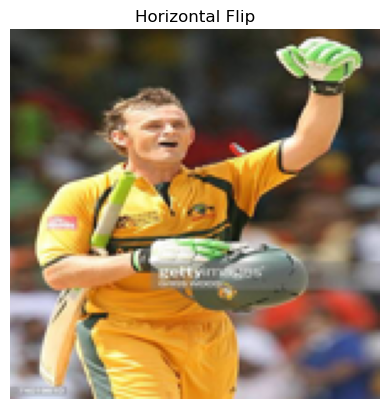

In [31]:
# horizontal flip
datagen = ImageDataGenerator(horizontal_flip=True, rescale=1./255)
batch = next(datagen.flow(x, batch_size=1))
plt.imshow(batch[0])
plt.title("Horizontal Flip")
plt.axis("off")
plt.show()


In [33]:
# ALL DATA AUGMENTATION COMBINED READY TO TRAIN

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "Cricket Legends"


train_datagen = ImageDataGenerator(
    rescale=1./255,            # normalize pixel values to [0,1]
    rotation_range=20,         # random rotations ±20°
    width_shift_range=0.2,     # random horizontal shifts ±20%
    height_shift_range=0.2,    # random vertical shifts ±20%
    zoom_range=0.2,            # random zoom ±20%
    horizontal_flip=True,      # random horizontal flips
    fill_mode='nearest'        # fill empty areas after transforms
)


train_generator = train_datagen.flow_from_directory(
    data_dir,                  # path to root folder
    target_size=(150, 150),    # resize all images to 150×150
    batch_size=32,             # batch size
    class_mode='categorical'   # one-hot encode labels
)

# ready for model.fit()


Found 6948 images belonging to 30 classes.


In [4]:
#Data Augmentation and Data setup (Changed) for Training using Pre-Trained Model

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# 1️⃣ Data Augmentation & Dataset Setup
data_dir = "Cricket Legends"

train_datagen = ImageDataGenerator(
    rescale=1./255,              # normalize pixel values to [0,1]
    rotation_range=40,           # random rotations ±40°
    width_shift_range=0.2,       # random horizontal shifts ±20%
    height_shift_range=0.2,      # random vertical shifts ±20%
    shear_range=0.2,             # shear transformations
    zoom_range=0.2,              # random zoom ±20%
    horizontal_flip=True,        # random horizontal flips
    fill_mode='nearest',         # fill in empty pixels after transforms
    validation_split=0.2         # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5570 images belonging to 30 classes.
Found 1378 images belonging to 30 classes.


In [8]:
#Ready to Train using a Pre-Trained Model

In [10]:
# Transfer Learning Defination: Transfer learning is when you take a model that was trained on a large dataset (like ImageNet) 
#and reuse its learned knowledge for a different but related task — usually with less data and time.

In [12]:
# Transfer Learning Implementation


# 1. Load Mobilenet Without its Top Layer


# 2. Freeze the convolutional base so its weights arent updated during training


# 3. Add a custom Classification Layer 


# 4. Compile and Train

In [10]:
# Loading MobileNet Model Without Top Layer


base_model = MobileNet(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)

C:\Users\tarun\AppData\Local\Temp\ipykernel_936\466915571.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(


In [1]:
# Freeze the Convultional Base Layer

In [12]:
base_model.trainable = False

In [14]:
# Adding Custom Classification Layer

In [16]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [18]:
# Compile

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
# Train

In [24]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

D:\Users\tarun\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 91s 504ms/step - accuracy: 0.0392 - loss: 3.6291 - val_accuracy: 0.0624 - val_loss: 3.3733
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 85s 484ms/step - accuracy: 0.0552 - loss: 3.3674 - val_accuracy: 0.0813 - val_loss: 3.3111
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 84s 479ms/step - accuracy: 0.0768 - loss: 3.3124 - val_accuracy: 0.1219 - val_loss: 3.1797
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 92s 527ms/step - accuracy: 0.0945 - loss: 3.2276 - val_accuracy: 0.1524 - val_loss: 3.0633
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 90s 517ms/step - accuracy: 0.1153 - loss: 3.1206 - val_accuracy: 0.1720 - val_loss: 3.0038
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 86s 490ms/step - accuracy: 0.1114 - loss: 3.0678 - val_accuracy: 0.1843 - val_loss: 2.9006
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 84s 483ms/step - accuracy: 0.1330 - loss: 3.0366 - val_accuracy: 0.1872 - val_loss: 2.8737
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 89s 506ms/step - accuracy: 0.1275 - loss: 2